# Correlation Analysis of LIP Area and Ice Extent

The column names and associated column numbers (note: first column is 1!)

|name|column number|
|----|-------------|
|age (Ma)|1|
|ice extent|2|
|total|3|
|within 10|4|
|within 15|5|
|within 20|6|
|decay36 total|7|
|decay36 within 10|8|
|decay36 within 15|9|
|decay36 within 20|10|
|decay120 total|11|
|decay120 within 10|12|
|decay120 within 15|13|
|decay120 within 20|14|
|decay36_burial50 total|15|
|decay36_burial50 within 10|16|
|decay36_burial50 within 15|17|
|decay36_burial50 within 20|18|
|decay120_burial50 total|19|
|decay120_burial50 within 10|20|
|decay120_burial50 within 15|21|
|decay120_burial50 within 20|22|
|decay36_burial100 total|23|
|decay36_burial100 within 10|24|
|decay36_burial100 within 15|25|
|decay36_burial100 within 20|26|
|decay120_burial100 total|27|
|decay120_burial100 within 10|28|
|decay120_burial100 within 15|29|
|decay120_burial100 within 20|30|
|craton total|31|
|craton within 10|32|
|craton within 15|33|
|craton within 20|34|

## Read in the Data

In [1]:
LIP_data = load('./reconstruction_output/summary_output.txt');

In [2]:
ice=LIP_data(:,1:2);
icenorm=ice(:,2)/max(ice(:,2));  % Scale ice from 0-1
icelat_real=flipud(ice(:,2));  % Flip time series to start at 520 Ma
time=-1*ice(:,1);  % Use negative numbers for past times

Seed the RNG:

In [3]:
rng(1) % Seed random numbers so results are reproducible

Extract columns:

In [4]:
decay1_all = LIP_data(:,7)/max(LIP_data(:,7));
decay1_trop = LIP_data(:,9)/max(LIP_data(:,9));
decay2_all = LIP_data(:,11)/max(LIP_data(:,11));
decay2_trop = LIP_data(:,13)/max(LIP_data(:,13));
decay1_burial1_all = LIP_data(:,15)/max(LIP_data(:,15));
decay1_burial1_trop = LIP_data(:,17)/max(LIP_data(:,17));
decay2_burial1_all = LIP_data(:,19)/max(LIP_data(:,19));
decay2_burial1_trop = LIP_data(:,21)/max(LIP_data(:,21));
decay1_burial2_all = LIP_data(:,23)/max(LIP_data(:,23));
decay1_burial2_trop = LIP_data(:,25)/max(LIP_data(:,25));
decay2_burial2_all = LIP_data(:,27)/max(LIP_data(:,27));
decay2_burial2_trop = LIP_data(:,29)/max(LIP_data(:,29));
decay1_trop10 = LIP_data(:,8)/max(LIP_data(:,8));
decay1_trop20 = LIP_data(:,10)/max(LIP_data(:,10));
decay1_burial1_trop10 = LIP_data(:,16)/max(LIP_data(:,16));
decay1_burial1_trop20 = LIP_data(:,18)/max(LIP_data(:,18));
decay1_burial2_trop10 = LIP_data(:,24)/max(LIP_data(:,24));
decay1_burial2_trop20 = LIP_data(:,26)/max(LIP_data(:,26));
decay2_burial2_trop10 = LIP_data(:,28)/max(LIP_data(:,28));
decay2_burial2_trop20 = LIP_data(:,30)/max(LIP_data(:,30));
craton_all = LIP_data(:,31)/max(LIP_data(:,31));
craton_trop10 = LIP_data(:,32)/max(LIP_data(:,32));
craton_trop = LIP_data(:,33)/max(LIP_data(:,33));
craton_trop20 = LIP_data(:,34)/max(LIP_data(:,34));

% Flip time series to start at 520 Ma
flip_decay1_all = flipud(decay1_all);
flip_decay1_trop=flipud(decay1_trop);
flip_decay2_all = flipud(decay2_all);
flip_decay2_trop=flipud(decay2_trop);
flip_decay1_burial1_all=flipud(decay1_burial1_all);
flip_decay1_burial1_trop=flipud(decay1_burial1_trop);
flip_decay2_burial1_all=flipud(decay2_burial1_all);
flip_decay2_burial1_trop=flipud(decay2_burial1_trop);
flip_decay1_burial2_all=flipud(decay1_burial2_all);
flip_decay1_burial2_trop=flipud(decay1_burial2_trop);
flip_decay2_burial2_all=flipud(decay2_burial2_all);
flip_decay2_burial2_trop=flipud(decay2_burial2_trop);
flip_decay1_trop10 = flipud(decay1_trop10);
flip_decay1_trop20 = flipud(decay1_trop20);
flip_decay1_burial1_trop10 = flipud(decay1_burial1_trop10);
flip_decay1_burial1_trop20 = flipud(decay1_burial1_trop20);
flip_decay1_burial2_trop10 = flipud(decay1_burial2_trop10);
flip_decay1_burial2_trop20 = flipud(decay1_burial2_trop20);
flip_decay2_burial2_trop10 = flipud(decay2_burial2_trop10);
flip_decay2_burial2_trop20 = flipud(decay2_burial2_trop20);
flip_craton_all = flipud(craton_all);
flip_craton_trop10 = flipud(craton_trop10);
flip_craton_trop = flipud(craton_trop);
flip_craton_trop20 = flipud(craton_trop20);

Identify when LIP area is at least 30% of the max:

In [5]:
% Identify true(1)/false(0) whether LIPs are present at each time step
% Only count LIPs that are at least 30% as extensive as max
bin_decay1_all = flipud(decay1_all)'>0.3;
bin_decay1_trop = flipud(decay1_trop)'>0.3;
bin_decay2_all = flipud(decay2_all)'>0.3;
bin_decay2_trop = flipud(decay2_trop)'>0.3;
bin_decay1_burial1_all = flipud(decay1_burial1_all)'>0.3;
bin_decay1_burial1_trop = flipud(decay1_burial1_trop)'>0.3;
bin_decay2_burial1_all = flipud(decay2_burial1_all)'>0.3;
bin_decay2_burial1_trop = flipud(decay2_burial1_trop)'>0.3;
bin_decay1_burial2_all = flipud(decay1_burial2_all)'>0.3;
bin_decay1_burial2_trop = flipud(decay1_burial2_trop)'>0.3;
bin_decay2_burial2_all = flipud(decay2_burial2_all)'>0.3;
bin_decay2_burial2_trop = flipud(decay2_burial2_trop)'>0.3;
bin_decay1_trop10 = flipud(decay1_trop10)'>0.3;
bin_decay1_trop20 = flipud(decay1_trop20)'>0.3;
bin_decay1_burial1_trop10 = flipud(decay1_burial1_trop10)'>0.3;
bin_decay1_burial1_trop20 = flipud(decay1_burial1_trop20)'>0.3;
bin_decay1_burial2_trop10 = flipud(decay1_burial2_trop10)'>0.3;
bin_decay1_burial2_trop20 = flipud(decay1_burial2_trop20)'>0.3;
bin_decay2_burial2_trop10 = flipud(decay2_burial2_trop10)'>0.3;
bin_decay2_burial2_trop20 = flipud(decay2_burial2_trop20)'>0.3;
bin_craton_all = flipud(craton_all)'>0.3;
bin_craton_trop10 = flipud(craton_trop10)'>0.3;
bin_craton_trop = flipud(craton_trop)'>0.3;
bin_craton_trop20 = flipud(craton_trop20)'>0.3;

disp('_________________________________________________________________________________')
disp('Percent of record with LIP >30% of max:')
disp('decay1 (all, tropical), decay2 (all, tropical), decay1_burial1 (all, tropical), decay2_burial1 (all, tropical), decay1_burial2 (all, tropical), decay2_burial2 (all, tropical)')
100/length(LIP_data)*[sum(bin_decay1_all) sum(bin_decay1_trop) ...
sum(bin_decay2_all) sum(bin_decay2_trop) ...
sum(bin_decay1_burial1_all) sum(bin_decay1_burial1_trop) ...
sum(bin_decay2_burial1_all) sum(bin_decay2_burial1_trop) ...
sum(bin_decay1_burial2_all) sum(bin_decay1_burial2_trop) ...
sum(bin_decay2_burial2_all) sum(bin_decay2_burial2_trop)]

_________________________________________________________________________________
Percent of record with LIP >30% of max:
decay1 (all, tropical), decay2 (all, tropical), decay1_burial1 (all, tropical), decay2_burial1 (all, tropical), decay1_burial2 (all, tropical), decay2_burial2 (all, tropical)

ans =

  Columns 1 through 7

   48.5714   30.4762   70.4762   69.5238   63.8095   28.5714   80.0000

  Columns 8 through 12

   70.4762   63.8095   19.0476   91.4286   30.4762



Plot everything:

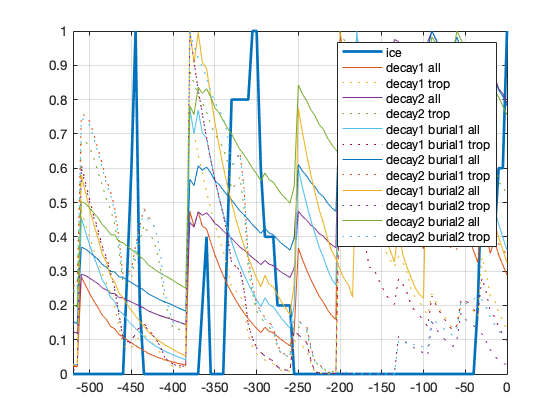

In [6]:
figure(50)
plot(time, icenorm,'LineWidth',2)
hold on
plot(time, decay1_all)
plot(time, decay1_trop,':')
plot(time, decay2_all)
plot(time, decay2_trop,':')
plot(time, decay1_burial1_all)
plot(time, decay1_burial1_trop,':')
plot(time, decay2_burial1_all)
plot(time, decay2_burial1_trop,':')
plot(time, decay1_burial2_all)
plot(time, decay1_burial2_trop,':')
plot(time, decay2_burial2_all)
plot(time, decay2_burial2_trop,':')
hold off
legend('ice','decay1 all','decay1 trop','decay2 all','decay2 trop','decay1 burial1 all','decay1 burial1 trop','decay2 burial1 all','decay2 burial1 trop','decay1 burial2 all','decay1 burial2 trop','decay2 burial2 all','decay2 burial2 trop')
axis tight
grid on

## Correlation Calculations

Calculations for the actual data - a subset of these results are presented in Table 2 of the manuscript:

In [7]:
% Correlation calculations for real data

% Correlation coefficients between ice extent and LIP areas
cc=corrcoef(icelat_real,flip_decay1_all);
cc_real_decay1_all=cc(1,2);

cc=corrcoef(icelat_real,flip_decay1_trop);
cc_real_decay1_trop=cc(1,2);

cc=corrcoef(icelat_real,flip_decay2_all);
cc_real_decay2_all=cc(1,2);

cc=corrcoef(icelat_real,flip_decay2_trop);
cc_real_decay2_trop=cc(1,2);

cc=corrcoef(icelat_real,flip_decay1_burial1_all);
cc_real_decay1_burial1_all=cc(1,2);

cc=corrcoef(icelat_real,flip_decay1_burial1_trop);
cc_real_decay1_burial1_trop=cc(1,2);

cc=corrcoef(icelat_real,flip_decay2_burial1_all);
cc_real_decay2_burial1_all=cc(1,2);

cc=corrcoef(icelat_real,flip_decay2_burial1_trop);
cc_real_decay2_burial1_trop=cc(1,2);

cc=corrcoef(icelat_real,flip_decay1_burial2_all);
cc_real_decay1_burial2_all=cc(1,2);

cc=corrcoef(icelat_real,flip_decay1_burial2_trop);
cc_real_decay1_burial2_trop=cc(1,2);

cc=corrcoef(icelat_real,flip_decay2_burial2_all);
cc_real_decay2_burial2_all=cc(1,2);

cc=corrcoef(icelat_real,flip_decay2_burial2_trop);
cc_real_decay2_burial2_trop=cc(1,2);

cc=corrcoef(icelat_real,flip_decay1_trop10);
cc_real_decay1_trop10=cc(1,2);

cc=corrcoef(icelat_real,flip_decay1_trop20);
cc_real_decay1_trop20=cc(1,2);

cc=corrcoef(icelat_real,flip_decay1_burial1_trop10);
cc_real_decay1_burial1_trop10=cc(1,2);

cc=corrcoef(icelat_real,flip_decay1_burial1_trop20);
cc_real_decay1_burial1_trop20=cc(1,2);

cc=corrcoef(icelat_real,flip_decay1_burial2_trop10);
cc_real_decay1_burial2_trop10=cc(1,2);

cc=corrcoef(icelat_real,flip_decay1_burial2_trop20);
cc_real_decay1_burial2_trop20=cc(1,2);

cc=corrcoef(icelat_real,flip_decay2_burial2_trop10);
cc_real_decay2_burial2_trop10=cc(1,2);

cc=corrcoef(icelat_real,flip_decay2_burial2_trop20);
cc_real_decay2_burial2_trop20=cc(1,2);

cc=corrcoef(icelat_real,flip_craton_all);
cc_real_craton_all=cc(1,2);

cc=corrcoef(icelat_real,flip_craton_trop10);
cc_real_craton_trop10=cc(1,2);

cc=corrcoef(icelat_real,flip_craton_trop);
cc_real_craton_trop=cc(1,2);

cc=corrcoef(icelat_real,flip_craton_trop20);
cc_real_craton_trop20=cc(1,2);

cc_real_values = [cc_real_decay1_all, cc_real_decay1_trop10, cc_real_decay1_trop, cc_real_decay1_trop20,...
cc_real_decay1_burial1_all, cc_real_decay1_burial1_trop10, cc_real_decay1_burial1_trop, cc_real_decay1_burial1_trop20,...
cc_real_decay1_burial2_all, cc_real_decay1_burial2_trop10, cc_real_decay1_burial2_trop, cc_real_decay1_burial2_trop20,...
cc_real_decay2_burial2_all, cc_real_decay2_burial2_trop10, cc_real_decay2_burial2_trop, cc_real_decay2_burial2_trop20,...
cc_real_craton_all,cc_real_craton_trop10,cc_real_craton_trop,cc_real_craton_trop20];

disp('Correlation between ice extent and LIP length:')
disp('decay1 (all, tropical 10, tropical 15, tropical 20), decay1_burial1 (all, tropical 10, tropical 15, tropical 20), decay1_burial2 (all, tropical 10, tropical 15, tropical 20), decay2_burial2 (all, tropical 10, tropical 15, tropical 20), craton (all, tropical 10, tropical 15, tropical 20)')
cc_real_values

Correlation between ice extent and LIP length:
decay1 (all, tropical 10, tropical 15, tropical 20), decay1_burial1 (all, tropical 10, tropical 15, tropical 20), decay1_burial2 (all, tropical 10, tropical 15, tropical 20), decay2_burial2 (all, tropical 10, tropical 15, tropical 20)

cc_real_values =

  Columns 1 through 7

   -0.2569   -0.2235   -0.1914   -0.1659   -0.2452   -0.1730   -0.1383

  Columns 8 through 14

   -0.1033   -0.1410   -0.0764   -0.0217    0.0381    0.0043    0.0185

  Columns 15 through 16

    0.1035    0.1904



Identify when ice extent is at least 10 degrees from the poles:

In [8]:
%%  Identify glaciated and unglaciated intervals


% Identify true(1)/false(0) whether ice is present at each time step
% Only count ice extent at least 10 degrees from poles
binice=flipud(ice(:,2))'>10;
disp(['Percent of record with ice extent > 10^o is ' num2str(100*sum(binice)/length(ice))])
disp('')

% Identify/measure durations of glaciated and unglaciated intervals 
% CAUTION: Code assumes that there are 4 identified glaciations

tempbinice=binice;  % true(1)/false(0) whether ice is present
tempice=flipud(ice(:,2))';  % latitude extent of ice
for i=1:4
    ind=min(find(tempbinice==1)); % Find first instance of ice
    no_ice_dur(i)=ind-1;          % Duration of first unglaciated interval
    tempbinice=tempbinice(ind:end);  %Remove identified portion from temp record
    tempice=tempice(ind:end);        %Remove identified portion from temp record
    if i<4
        ind=min(find(tempbinice==0));  % Find next time without ice
        ice_lat{i}=tempice(1:ind-1);   % ice extent within glaciated interval
        ice_dur(i)=ind-1;              % duration of glaciated interval
        tempbinice=tempbinice(ind:end); %Remove identified portion from temp record
        tempice=tempice(ind:end);
    else
        ice_dur(i)=length(tempbinice);  % duration of last glaciated interval
        ice_lat{i}=tempice(1:end);      % ice extent within last glaciated interval
    end
end
ice_lat_real=ice_lat; 

disp('Number of 5-Myr time steps in each ice age (1st line) & between ice ages (2nd line)')
[ice_dur; no_ice_dur]

Ngap=sum(no_ice_dur);  % Total time steps without ice
pctice=sum(ice_dur)/105;  %Percent of time with ice present

Percent of record with ice extent > 10^o is 21.9048
Number of 5-Myr time steps in each ice age (1st line) & between ice ages (2nd line)

ans =

     7    12     1    16
     0    49     4    16



Calculations for overlap - a subset of these results are presented in Table 2 in the manuscript:

In [9]:
% Calculate overlap between presence ice and sutures
ovlp_decay1_all=sum(binice.*bin_decay1_all);
ovlp_decay1_trop=sum(binice.*bin_decay1_trop);
ovlp_decay2_all=sum(binice.*bin_decay2_all);
ovlp_decay2_trop=sum(binice.*bin_decay2_trop);
ovlp_decay1_burial1_all=sum(binice.*bin_decay1_burial1_all);
ovlp_decay1_burial1_trop=sum(binice.*bin_decay1_burial1_trop);
ovlp_decay2_burial1_all=sum(binice.*bin_decay2_burial1_all);
ovlp_decay2_burial1_trop=sum(binice.*bin_decay2_burial1_trop);
ovlp_decay1_burial2_all=sum(binice.*bin_decay1_burial2_all);
ovlp_decay1_burial2_trop=sum(binice.*bin_decay1_burial2_trop);
ovlp_decay2_burial2_all=sum(binice.*bin_decay2_burial2_all);
ovlp_decay2_burial2_trop=sum(binice.*bin_decay2_burial2_trop);
ovlp_decay1_trop10=sum(binice.*bin_decay1_trop10);
ovlp_decay1_trop20=sum(binice.*bin_decay1_trop20);
ovlp_decay1_burial1_trop10=sum(binice.*bin_decay1_burial1_trop10);
ovlp_decay1_burial1_trop20=sum(binice.*bin_decay1_burial1_trop20);
ovlp_decay1_burial2_trop10=sum(binice.*bin_decay1_burial2_trop10);
ovlp_decay1_burial2_trop20=sum(binice.*bin_decay1_burial2_trop20);
ovlp_decay2_burial2_trop10=sum(binice.*bin_decay2_burial2_trop10);
ovlp_decay2_burial2_trop20=sum(binice.*bin_decay2_burial2_trop20);
ovlp_craton_all=sum(binice.*bin_craton_all);
ovlp_craton_trop10=sum(binice.*bin_craton_trop10);
ovlp_craton_trop=sum(binice.*bin_craton_trop);
ovlp_craton_trop20=sum(binice.*bin_craton_trop20);

disp('Ice-LIP overlap as percent of time glaciated (ice>10)')
disp('decay1 (all, tropical 10, tropical 15, tropical 20), decay1_burial1 (all, tropical 10, tropical 15, tropical 20), decay1_burial2 (all, tropical 10, tropical 15, tropical 20), decay2_burial2 (all, tropical 10, tropical 15, tropical 20)')
100/sum(binice)*[ovlp_decay1_all ovlp_decay1_trop10 ovlp_decay1_trop ovlp_decay1_trop20 ...
ovlp_decay1_burial1_all ovlp_decay1_burial1_trop10 ovlp_decay1_burial1_trop ovlp_decay1_burial1_trop20 ...
ovlp_decay1_burial2_all ovlp_decay1_burial2_trop10 ovlp_decay1_burial2_trop ovlp_decay1_burial2_trop20 ...
ovlp_decay2_burial2_all ovlp_decay2_burial2_trop10 ovlp_decay2_burial2_trop ovlp_decay2_burial2_trop20 ...
ovlp_craton_all ovlp_craton_trop10 ovlp_craton_trop ovlp_craton_trop20]

disp('Ice-LIP overlap as percent of time LIP >20% of modern')
disp('decay1 (all, tropical 10, tropical 15, tropical 20), decay1_burial1 (all, tropical 10, tropical 15, tropical 20), decay1_burial2 (all, tropical 10, tropical 15, tropical 20), decay2_burial2 (all, tropical 10, tropical 15, tropical 20)')
100*[ovlp_decay1_all/sum(bin_decay1_all) ovlp_decay1_trop10/sum(bin_decay1_trop10) ovlp_decay1_trop/sum(bin_decay1_trop) ovlp_decay1_trop20/sum(bin_decay1_trop20) ...
ovlp_decay1_burial1_all/sum(bin_decay1_burial1_all) ovlp_decay1_burial1_trop10/sum(bin_decay1_burial1_trop10) ovlp_decay1_burial1_trop/sum(bin_decay1_burial1_trop) ovlp_decay1_burial1_trop20/sum(bin_decay1_burial1_trop20) ...
ovlp_decay1_burial2_all/sum(bin_decay1_burial2_all) ovlp_decay1_burial2_trop10/sum(bin_decay1_burial2_trop10) ovlp_decay1_burial2_trop/sum(bin_decay1_burial2_trop) ovlp_decay1_burial2_trop20/sum(bin_decay1_burial2_trop20) ...
ovlp_decay2_burial2_all/sum(bin_decay2_burial2_all) ovlp_decay2_burial2_trop10/sum(bin_decay2_burial2_trop10) ovlp_decay2_burial2_trop/sum(bin_decay2_burial2_trop) ovlp_decay2_burial2_trop20/sum(bin_decay2_burial2_trop20) ...
ovlp_craton_all/sum(bin_craton_all) ovlp_craton_trop10/sum(bin_craton_trop10) ovlp_craton_trop/sum(bin_craton_trop) ovlp_craton_trop20/sum(bin_craton_trop20)]

Ice-LIP overlap as percent of time glaciated (ice>10)
decay1 (all, tropical 10, tropical 15, tropical 20), decay1_burial1 (all, tropical 10, tropical 15, tropical 20), decay1_burial2 (all, tropical 10, tropical 15, tropical 20), decay2_burial2 (all, tropical 10, tropical 15, tropical 20)

ans =

  Columns 1 through 7

   30.4348   13.0435   13.0435    8.6957   52.1739    8.6957   21.7391

  Columns 8 through 14

   26.0870   65.2174    8.6957   21.7391   21.7391  100.0000   26.0870

  Columns 15 through 16

   34.7826   47.8261

Ice-LIP overlap as percent of time LIP >20% of modern
decay1 (all, tropical 10, tropical 15, tropical 20), decay1_burial1 (all, tropical 10, tropical 15, tropical 20), decay1_burial2 (all, tropical 10, tropical 15, tropical 20), decay2_burial2 (all, tropical 10, tropical 15, tropical 20)

ans =

  Columns 1 through 7

   13.7255    8.5714    9.3750    6.8966   17.9104    8.6957   16.6667

  Columns 8 through 14

   18.1818   22.3881   11.7647   25.0000   25.000

## Simulated Ice Ages

In [10]:
%% Create simulated climate records by re-arranging ice intervals

% Simulations will be used to test the hypothesis that ice ages are
% NOT related to LIP area. Therefore, climate simulations are
% designed to generate uniform probability for 4 ice ages occuring
% at anytime throughout the last 520 Myr

% clear memory for variables created within loop
all_sim=[]; all_gap=[]; all_end=[]; all_lat=[];
ovlp_sim=[]; cc_sim=[]; allstart=[];

ITER=100000; % Number of Monte carlo simulations (use 10,000 or 20,000)

for j=1:ITER
    ice_lat=ice_lat_real;  % create copy of ice latitude extent
    iceflip=randi(2,1,4);  % 50% chance of mirror-image for lat extent variation
    for i=1:4
        if iceflip(i)==1
            ice_lat{i}=fliplr(ice_lat_real{i});
        end
    end
    
    iceorder=randperm(4);  % pick random order for ice intervals
    
    % clear variables used to create climate simulation
    simi=[]; sim=[]; simlat=[];

    % Percent of time with ice determines chance of ice at start or end of record
    endstate=(rand(1,2) < pctice); 
    all_end(j,:)=endstate; %save endstate results 
    
    if sum(endstate)>=1 % If record starts OR ends in a glacial state
        
        % If starting with ice, 40 percent chance simulation starts midway through an ice age
        % In which case ice age wraps around (i.e., one portion at start of
        % simulation and the rest at end of simulation)
        if rand <.4 && ice_dur(iceorder(1))>1 
            startdur=randi(ice_dur(iceorder(1))-1);  % Pick which time step in the glaciated interval
        
        % If not starting midway through glaciation, 50 percent chance ice age is at start of simulation
        elseif rand < .5 
            startdur=0;  %starts in non-glacial state and ends with ice
        else   
            startdur=ice_dur(iceorder(1)); %starts with full duration of an ice age
        end
        
        % Begin constructing climate simulation
        
        if startdur>0  % If simulation starts with an ice age, apend duration/latitude of ice
            simi=[simi startdur];
            sim=[sim ones(1,startdur)];
            simlat=[simlat ice_lat{iceorder(1)}(end-startdur+1:end)];
        end

        allstart(end+1,:)=[iceorder(1) startdur]; %save info about initial ice age
        
        rn=lognrnd(0,1,1,4);  %Generate log-normal wait times between ice ages
        rand_gap=round(Ngap*rn/sum(rn));  %Scale wait time sum to total non-glaciated timespan
        
        % Small adjustment if rounding doesn't produce correct sum
        rand_gap(2)=rand_gap(2)-(sum(rand_gap)-Ngap); 
        while min(rand_gap)<=0 % repeat if adjustment produces a negative wait time
            rn=lognrnd(0,1,1,4);
            rand_gap=round(Ngap*rn/sum(rn));
            rand_gap(2)=rand_gap(2)-(sum(rand_gap)-Ngap);
        end
        
        for i=1:3  % Append subsequent non-glacial and glacial intervals
            simi=[simi rand_gap(i) ice_dur(iceorder(i+1))];
            sim=[sim zeros(1,rand_gap(i)) ones(1,ice_dur(iceorder(i+1)))];
            simlat=[simlat zeros(1,rand_gap(i)) ice_lat{iceorder(i+1)}];
        end
        
        % If starting with non-glacial state or starting midway through glacial interval 
        % add glacial state to end of simulation 
        %(remaining portion if starting midway through)
        if startdur < ice_dur(iceorder(1)) 
            simi=[simi rand_gap(4) ice_dur(iceorder(1))-startdur]; 
            sim=[sim zeros(1,rand_gap(4)) ones(1,ice_dur(iceorder(1))-startdur)];
            simlat=[simlat zeros(1,rand_gap(4)) ice_lat{iceorder(1)}(1:end-startdur)];
        
        else % otherwise end in non-glacial state
            simi=[simi rand_gap(4)];
            sim=[sim zeros(1,rand_gap(4))];
            simlat=[simlat zeros(1,rand_gap(4))];
        end

    
    else  % If simulation starts AND ends in non-glacial state
        
        rn=lognrnd(0,1,1,5); % create log-normal wait times for 5 non-glacial intervals
        rand_gap=round(Ngap*rn/sum(rn));
        % Small adjustment if rounding doesn't produce correct sum
        rand_gap(2)=rand_gap(2)-(sum(rand_gap)-Ngap);
        while min(rand_gap)<=0 % repeat if adjustment produces a negative wait time
            rn=lognrnd(0,1,1,5);
            rand_gap=round(Ngap*rn/sum(rn));
            rand_gap(2)=rand_gap(2)-(sum(rand_gap)-Ngap);
        end
        
        % Append successive non-glacial and glacial intervals
        for i=1:4
            simi=[simi rand_gap(i) ice_dur(iceorder(i))];
            sim=[sim zeros(1,rand_gap(i)) ones(1,ice_dur(iceorder(i)))];
            simlat=[simlat zeros(1,rand_gap(i)) ice_lat{iceorder(i)}];
        end
        % add last non-glacial state
        simi(end+1)=rand_gap(5);
        sim=[sim zeros(1,rand_gap(5))];
        simlat=[simlat zeros(1,rand_gap(5))];
    end
    % end construction of climate simulation
    
    % check that simulation has correct total length or print an error
    if length(simlat)~=105
        disp(['Error simulation length =' num2str(sum(simi))])
        disp(['Error simulation length =' num2str(length(simlat))])
        sim=sim(1:105);
    end
    
    % add simulation to matrix containing all simulations
    simice=sim;
    all_sim(j,:)=simice;
    all_lat(j,:)=simlat;
    
    % calculate overlap between simulated ice and real suture data
    ovlp_sim_decay1_all(j)=sum(simice.*bin_decay1_all);
    ovlp_sim_decay1_trop(j)=sum(simice.*bin_decay1_trop);
    ovlp_sim_decay2_all(j)=sum(simice.*bin_decay2_all);
    ovlp_sim_decay2_trop(j)=sum(simice.*bin_decay2_trop);
    ovlp_sim_decay1_burial1_all(j)=sum(simice.*bin_decay1_burial1_all);
    ovlp_sim_decay1_burial1_trop(j)=sum(simice.*bin_decay1_burial1_trop);
    ovlp_sim_decay2_burial1_all(j)=sum(simice.*bin_decay2_burial1_all);
    ovlp_sim_decay2_burial1_trop(j)=sum(simice.*bin_decay2_burial1_trop);
    ovlp_sim_decay1_burial2_all(j)=sum(simice.*bin_decay1_burial2_all);
    ovlp_sim_decay1_burial2_trop(j)=sum(simice.*bin_decay1_burial2_trop);
    ovlp_sim_decay2_burial2_all(j)=sum(simice.*bin_decay2_burial2_all);
    ovlp_sim_decay2_burial2_trop(j)=sum(simice.*bin_decay2_burial2_trop);
    ovlp_sim_decay1_trop10(j)=sum(simice.*bin_decay1_trop10);
    ovlp_sim_decay1_trop20(j)=sum(simice.*bin_decay1_trop20);
    ovlp_sim_decay1_burial1_trop10(j)=sum(simice.*bin_decay1_burial1_trop10);
    ovlp_sim_decay1_burial1_trop20(j)=sum(simice.*bin_decay1_burial1_trop20);
    ovlp_sim_decay1_burial2_trop10(j)=sum(simice.*bin_decay1_burial2_trop10);
    ovlp_sim_decay1_burial2_trop20(j)=sum(simice.*bin_decay1_burial2_trop20);
    ovlp_sim_decay2_burial2_trop10(j)=sum(simice.*bin_decay2_burial2_trop10);
    ovlp_sim_decay2_burial2_trop20(j)=sum(simice.*bin_decay2_burial2_trop20);
    ovlp_sim_craton_all(j)=sum(simice.*bin_craton_all);
    ovlp_sim_craton_trop10(j)=sum(simice.*bin_craton_trop10);
    ovlp_sim_craton_trop(j)=sum(simice.*bin_craton_trop);
    ovlp_sim_craton_trop20(j)=sum(simice.*bin_craton_trop20);

    % calculate correlation between simulated ice and real suture data
    cc=corrcoef(simlat,flip_decay1_all);
    cc_sim_decay1_all(j)=cc(1,2);

    cc=corrcoef(simlat,flip_decay1_trop);
    cc_sim_decay1_trop(j)=cc(1,2);

    cc=corrcoef(simlat,flip_decay2_all);
    cc_sim_decay2_all(j)=cc(1,2);

    cc=corrcoef(simlat,flip_decay2_trop);
    cc_sim_decay2_trop(j)=cc(1,2);

    cc=corrcoef(simlat,flip_decay1_burial1_all);
    cc_sim_decay1_burial1_all(j)=cc(1,2);

    cc=corrcoef(simlat,flip_decay1_burial1_trop);
    cc_sim_decay1_burial1_trop(j)=cc(1,2);

    cc=corrcoef(simlat,flip_decay2_burial1_all);
    cc_sim_decay2_burial1_all(j)=cc(1,2);

    cc=corrcoef(simlat,flip_decay2_burial1_trop);
    cc_sim_decay2_burial1_trop(j)=cc(1,2);

    cc=corrcoef(simlat,flip_decay1_burial2_all);
    cc_sim_decay1_burial2_all(j)=cc(1,2);

    cc=corrcoef(simlat,flip_decay1_burial2_trop);
    cc_sim_decay1_burial2_trop(j)=cc(1,2);

    cc=corrcoef(simlat,flip_decay2_burial2_all);
    cc_sim_decay2_burial2_all(j)=cc(1,2);

    cc=corrcoef(simlat,flip_decay2_burial2_trop);
    cc_sim_decay2_burial2_trop(j)=cc(1,2);
    
    cc=corrcoef(simlat,flip_decay1_trop10);
    cc_sim_decay1_trop10(j)=cc(1,2);

    cc=corrcoef(simlat,flip_decay1_trop20);
    cc_sim_decay1_trop20(j)=cc(1,2);

    cc=corrcoef(simlat,flip_decay1_burial1_trop10);
    cc_sim_decay1_burial1_trop10(j)=cc(1,2);

    cc=corrcoef(simlat,flip_decay1_burial1_trop20);
    cc_sim_decay1_burial1_trop20(j)=cc(1,2);

    cc=corrcoef(simlat,flip_decay1_burial2_trop10);
    cc_sim_decay1_burial2_trop10(j)=cc(1,2);

    cc=corrcoef(simlat,flip_decay1_burial2_trop20);
    cc_sim_decay1_burial2_trop20(j)=cc(1,2);

    cc=corrcoef(simlat,flip_decay2_burial2_trop10);
    cc_sim_decay2_burial2_trop10(j)=cc(1,2);

    cc=corrcoef(simlat,flip_decay2_burial2_trop20);
    cc_sim_decay2_burial2_trop20(j)=cc(1,2);
    
    cc=corrcoef(simlat,flip_craton_all);
    cc_sim_craton_all(j)=cc(1,2);
    
    cc=corrcoef(simlat,flip_craton_trop10);
    cc_sim_craton_trop10(j)=cc(1,2);
    
    cc=corrcoef(simlat,flip_craton_trop);
    cc_sim_craton_trop(j)=cc(1,2);
    
    cc=corrcoef(simlat,flip_craton_trop20);
    cc_sim_craton_trop20(j)=cc(1,2);
end
% End loop that creates all climate simulations

p-values:

In [11]:
%% Calculate and print p-values for real result compared to simulations
% p < 0.05 means we reject the null hypothesis that ice is unrelated
% to a particular LIP area time series.

p_ovlp_decay1_all=length(find(ovlp_sim_decay1_all>=ovlp_decay1_all))/ITER;
p_ovlp_decay1_trop=length(find(ovlp_sim_decay1_trop>=ovlp_decay1_trop))/ITER;
p_ovlp_decay2_all=length(find(ovlp_sim_decay2_all>=ovlp_decay2_all))/ITER;
p_ovlp_decay2_trop=length(find(ovlp_sim_decay2_trop>=ovlp_decay2_trop))/ITER;
p_ovlp_decay1_burial1_all=length(find(ovlp_sim_decay1_burial1_all>=ovlp_decay1_burial1_all))/ITER;
p_ovlp_decay1_burial1_trop=length(find(ovlp_sim_decay1_burial1_trop>=ovlp_decay1_burial1_trop))/ITER;
p_ovlp_decay2_burial1_all=length(find(ovlp_sim_decay2_burial1_all>=ovlp_decay2_burial1_all))/ITER;
p_ovlp_decay2_burial1_trop=length(find(ovlp_sim_decay2_burial1_trop>=ovlp_decay2_burial1_trop))/ITER;
p_ovlp_decay1_burial2_all=length(find(ovlp_sim_decay1_burial2_all>=ovlp_decay1_burial2_all))/ITER;
p_ovlp_decay1_burial2_trop=length(find(ovlp_sim_decay1_burial2_trop>=ovlp_decay1_burial2_trop))/ITER;
p_ovlp_decay2_burial2_all=length(find(ovlp_sim_decay2_burial2_all>=ovlp_decay2_burial2_all))/ITER;
p_ovlp_decay2_burial2_trop=length(find(ovlp_sim_decay2_burial2_trop>=ovlp_decay2_burial2_trop))/ITER;
p_ovlp_decay1_trop10=length(find(ovlp_sim_decay1_trop10>=ovlp_decay1_trop10))/ITER;
p_ovlp_decay1_trop20=length(find(ovlp_sim_decay1_trop20>=ovlp_decay1_trop20))/ITER;
p_ovlp_decay1_burial1_trop10=length(find(ovlp_sim_decay1_burial1_trop10>=ovlp_decay1_burial1_trop10))/ITER;
p_ovlp_decay1_burial1_trop20=length(find(ovlp_sim_decay1_burial1_trop20>=ovlp_decay1_burial1_trop20))/ITER;
p_ovlp_decay1_burial2_trop10=length(find(ovlp_sim_decay1_burial2_trop10>=ovlp_decay1_burial2_trop10))/ITER;
p_ovlp_decay1_burial2_trop20=length(find(ovlp_sim_decay1_burial2_trop20>=ovlp_decay1_burial2_trop20))/ITER;
p_ovlp_decay2_burial2_trop10=length(find(ovlp_sim_decay2_burial2_trop10>=ovlp_decay2_burial2_trop10))/ITER;
p_ovlp_decay2_burial2_trop20=length(find(ovlp_sim_decay2_burial2_trop20>=ovlp_decay2_burial2_trop20))/ITER;
p_ovlp_craton_all=length(find(ovlp_sim_craton_all>=ovlp_craton_all))/ITER;
p_ovlp_craton_trop10=length(find(ovlp_sim_craton_trop10>=ovlp_craton_trop10))/ITER;
p_ovlp_craton_trop=length(find(ovlp_sim_craton_trop>=ovlp_craton_trop))/ITER;
p_ovlp_craton_trop20=length(find(ovlp_sim_craton_trop20>=ovlp_craton_trop20))/ITER;

p_ovlp_values = [p_ovlp_decay1_all,p_ovlp_decay1_trop10,p_ovlp_decay1_trop,p_ovlp_decay1_trop20, ...
p_ovlp_decay1_burial1_all,p_ovlp_decay1_burial1_trop10,p_ovlp_decay1_burial1_trop,p_ovlp_decay1_burial1_trop20, ...
p_ovlp_decay1_burial2_all,p_ovlp_decay1_burial2_trop10,p_ovlp_decay1_burial2_trop,p_ovlp_decay1_burial2_trop20, ...
p_ovlp_decay2_burial2_all,p_ovlp_decay2_burial2_trop10,p_ovlp_decay2_burial2_trop,p_ovlp_decay2_burial2_trop20, ...
p_ovlp_craton_all,p_ovlp_craton_trop10,p_ovlp_craton_trop,p_ovlp_craton_trop20];

disp('p values: overlap')
p_ovlp_values

p_corr_decay1_all=length(find(cc_sim_decay1_all>=cc_real_decay1_all))/ITER;
p_corr_decay1_trop=length(find(cc_sim_decay1_trop>=cc_real_decay1_trop))/ITER;
p_corr_decay2_all=length(find(cc_sim_decay2_all>=cc_real_decay2_all))/ITER;
p_corr_decay2_trop=length(find(cc_sim_decay2_trop>=cc_real_decay2_trop))/ITER;
p_corr_decay1_burial1_all=length(find(cc_sim_decay1_burial1_all>=cc_real_decay1_burial1_all))/ITER;
p_corr_decay1_burial1_trop=length(find(cc_sim_decay1_burial1_trop>=cc_real_decay1_burial1_trop))/ITER;
p_corr_decay2_burial1_all=length(find(cc_sim_decay2_burial1_all>=cc_real_decay2_burial1_all))/ITER;
p_corr_decay2_burial1_trop=length(find(cc_sim_decay2_burial1_trop>=cc_real_decay2_burial1_trop))/ITER;
p_corr_decay1_burial2_all=length(find(cc_sim_decay1_burial2_all>=cc_real_decay1_burial2_all))/ITER;
p_corr_decay1_burial2_trop=length(find(cc_sim_decay1_burial2_trop>=cc_real_decay1_burial2_trop))/ITER;
p_corr_decay2_burial2_all=length(find(cc_sim_decay2_burial2_all>=cc_real_decay2_burial2_all))/ITER;
p_corr_decay2_burial2_trop=length(find(cc_sim_decay2_burial2_trop>=cc_real_decay2_burial2_trop))/ITER;
p_corr_decay1_trop10=length(find(cc_sim_decay1_trop10>=cc_real_decay1_trop10))/ITER;
p_corr_decay1_trop20=length(find(cc_sim_decay1_trop20>=cc_real_decay1_trop20))/ITER;
p_corr_decay1_burial1_trop10=length(find(cc_sim_decay1_burial1_trop10>=cc_real_decay1_burial1_trop10))/ITER;
p_corr_decay1_burial1_trop20=length(find(cc_sim_decay1_burial1_trop20>=cc_real_decay1_burial1_trop20))/ITER;
p_corr_decay1_burial2_trop10=length(find(cc_sim_decay1_burial2_trop10>=cc_real_decay1_burial2_trop10))/ITER;
p_corr_decay1_burial2_trop20=length(find(cc_sim_decay1_burial2_trop20>=cc_real_decay1_burial2_trop20))/ITER;
p_corr_decay2_burial2_trop10=length(find(cc_sim_decay2_burial2_trop10>=cc_real_decay2_burial2_trop10))/ITER;
p_corr_decay2_burial2_trop20=length(find(cc_sim_decay2_burial2_trop20>=cc_real_decay2_burial2_trop20))/ITER;
p_corr_craton_all=length(find(cc_sim_craton_all>=cc_real_craton_all))/ITER;
p_corr_craton_trop10=length(find(cc_sim_craton_trop10>=cc_real_craton_trop10))/ITER;
p_corr_craton_trop=length(find(cc_sim_craton_trop>=cc_real_craton_trop))/ITER;
p_corr_craton_trop20=length(find(cc_sim_craton_trop20>=cc_real_craton_trop20))/ITER;

p_corr_values = [p_corr_decay1_all,p_corr_decay1_trop10,p_corr_decay1_trop,p_corr_decay1_trop20, ...
p_corr_decay1_burial1_all,p_corr_decay1_burial1_trop10,p_corr_decay1_burial1_trop,p_corr_decay1_burial1_trop20, ...
p_corr_decay1_burial2_all,p_corr_decay1_burial2_trop10,p_corr_decay1_burial2_trop,p_corr_decay1_burial2_trop20, ...
p_corr_decay2_burial2_all,p_corr_decay2_burial2_trop10,p_corr_decay2_burial2_trop,p_corr_decay2_burial2_trop20, ...
p_corr_craton_all,p_corr_craton_trop10,p_corr_craton_trop,p_corr_craton_trop20];

disp('p values: correlation')
p_corr_values

p values: overlap

p_ovlp_values =

  Columns 1 through 7

    0.9533    0.9544    0.9379    0.9550    0.9656    0.9014    0.8460

  Columns 8 through 14

    0.8567    0.9414    0.7594    0.6488    0.6488    1.0000    0.7702

  Columns 15 through 16

    0.7152    0.6553

p values: correlation

p_corr_values =

  Columns 1 through 7

    0.8530    0.8572    0.8142    0.7738    0.8389    0.7874    0.7280

  Columns 8 through 14

    0.6683    0.7445    0.5376    0.4522    0.3705    0.5149    0.4048

  Columns 15 through 16

    0.3219    0.2377



## Figures

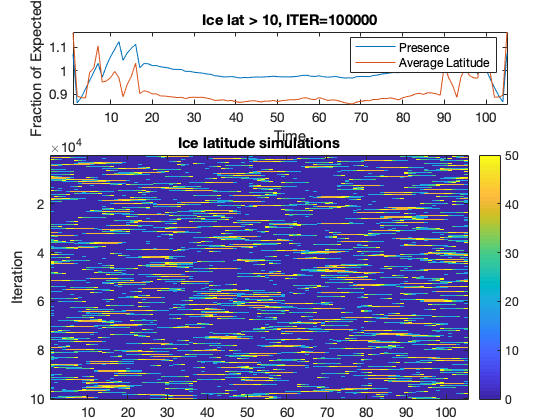

In [12]:
% Create figures to show results
figure(52) 
% Summary statistics of ice simulations
% Flat lines of ~1 are best fit with evenly distributed probabilities
% for ice through time (ie, null hypothesis)
subplot(311) 
plot(sum(all_sim)/(sum(ice_dur)/105*ITER))
hold on
plot(sum(all_lat)/(mean(icelat_real)*ITER))
hold off
axis tight
title(['Ice lat > 10, ITER=' num2str(ITER)])
xlabel('Time')
ylabel('Fraction of Expected')
legend('Presence','Average Latitude')

% Colors in each horizontal line represent ice latitude vs time for each
% simulation (should look like random noise)
subplot('Position',[.09 .05 .85 .58])
imagesc(all_lat)
colorbar
title('Ice latitude simulations')
xlabel('Time')
ylabel('Iteration')


fig = 

  Figure (58) with properties:

      Number: 58
        Name: ''
       Color: [0.9400 0.9400 0.9400]
    Position: [440 378 560 420]
       Units: 'pixels'

  Use GET to show all properties


fig = 

  Figure (58) with properties:

      Number: 58
        Name: ''
       Color: [0.9400 0.9400 0.9400]
    Position: [440 378 560 420]
       Units: 'pixels'

  Use GET to show all properties


fig = 

  Figure (58) with properties:

      Number: 58
        Name: ''
       Color: [0.9400 0.9400 0.9400]
    Position: [440 378 560 420]
       Units: 'pixels'

  Use GET to show all properties



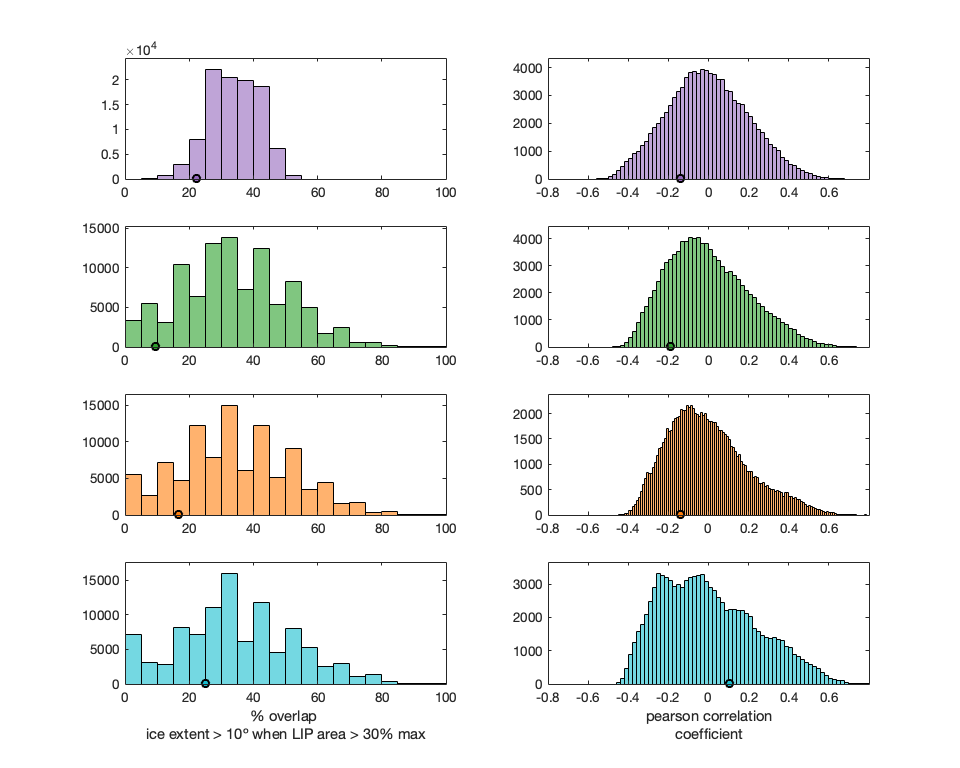

In [13]:
% d1+b2: purple - #9467bd - (148, 103, 189)
% d1: green - #2ca02c - (44, 160, 44)
% d1+b1: orange - #ff7f0e - (255, 127, 14)
% d2+b2: light blue - #17becf - (23, 190, 207)

col={[148, 103, 189]/255,[44, 160, 44]/255,[255, 127, 14]/255,[23, 190, 207]/255};

% Histograms illustrating p-values for overlaps and correlations
figure(58)
% Display overlap as a percent of amount of time sutures are present
% because, e.g., 5-degree sutures are present/extensive for less total time 
% than 10-degree sutures
subplot(421)
histogram(100*ovlp_sim_decay1_burial2_all/sum(bin_decay1_burial2_all),[0:5:100],'FaceColor',col{1})
hold on
plot(100*ovlp_decay1_burial2_all/sum(bin_decay1_burial2_all),1,'ko','MarkerFaceColor',col{1})
hold off
axis tight
%title('bars = simulations, circles = data')
%xlabel(['%Time glaciated: p=' num2str(p_ovlp_decay1_burial2_all)])
%legend('LIP total (d1+b2)')
yl =  ylim;
ylim([0 yl(2)*1.1])

subplot(423)
histogram(100*ovlp_sim_decay1_trop/sum(bin_decay1_trop),[0:5:100],'FaceColor',col{2})
hold on
plot(100*ovlp_decay1_trop/sum(bin_decay1_trop),1,'ko','MarkerFaceColor',col{2})
hold off
axis tight
%xlabel(['%Time glaciated: p=' num2str(p_ovlp_decay1_trop)])
%legend('LIP tropics (d1)')
yl =  ylim;
ylim([0 yl(2)*1.1])

subplot(425)
histogram(100*ovlp_sim_decay1_burial1_trop/sum(bin_decay1_burial1_trop),[0:5:100],'FaceColor',col{3})
hold on
plot(100*ovlp_decay1_burial1_trop/sum(bin_decay1_burial1_trop),1,'ko','MarkerFaceColor',col{3})
hold off
axis tight
%xlabel(['%Time glaciated: p=' num2str(p_ovlp_decay1_burial1_trop)])
%legend('LIP tropics (d1+b1)')
yl =  ylim;
ylim([0 yl(2)*1.1])

subplot(427)
histogram(100*ovlp_sim_decay2_burial2_trop/sum(bin_decay2_burial2_trop),[0:5:100],'FaceColor',col{4})
hold on
plot(100*ovlp_decay2_burial2_trop/sum(bin_decay2_burial2_trop),1,'ko','MarkerFaceColor',col{4})
hold off
axis tight
%xlabel(['%Time glaciated: p=' num2str(p_ovlp_decay2_burial2_trop)])
%legend('LIP tropics (d2+b2)')
xlabel({'% overlap ';'ice extent > 10º when LIP area > 30% max'})
yl =  ylim;
ylim([0 yl(2)*1.1])

subplot(422)
histogram(cc_sim_decay1_burial2_all,'FaceColor',col{1})
hold on
plot(cc_real_decay1_burial2_all,1,'ko','MarkerFaceColor',col{1})
hold off
axis tight
%title('bars = simulations, circles = data')
%xlabel(['Correlation: p=' num2str(p_corr_decay1_burial2_all)])
%legend('LIP total (d1+b2)')
xlim([-.8 .8])
yl =  ylim;
ylim([0 yl(2)*1.1])

subplot(424)
histogram(cc_sim_decay1_trop,'FaceColor',col{2});
hold on
plot(cc_real_decay1_trop,1,'ko','MarkerFaceColor',col{2})
hold off
axis tight
%xlabel(['Correlation: p=' num2str(p_corr_decay1_trop)])
%legend('LIP tropics (d1)')
xlim([-.8 .8])
yl =  ylim;
ylim([0 yl(2)*1.1])

subplot(426)
histogram(cc_sim_decay1_burial1_trop,'FaceColor',col{3});
hold on
plot(cc_real_decay1_burial1_trop,1,'ko','MarkerFaceColor',col{3})
hold off
axis tight
%xlabel(['Correlation: p=' num2str(p_corr_decay1_burial1_trop)])
%legend('LIP tropics (d1+b1)')
xlim([-.8 .8])
yl =  ylim;
ylim([0 yl(2)*1.1])

subplot(428)
histogram(cc_sim_decay2_burial2_trop,'FaceColor',col{4});
hold on
plot(cc_real_decay2_burial2_trop,1,'ko','MarkerFaceColor',col{4})
hold off
axis tight
%xlabel(['Correlation: p=' num2str(p_corr_decay2_burial2_trop)])
%legend('LIP tropics (d2+b2)')
xlim([-.8 .8])
yl =  ylim;
ylim([0 yl(2)*1.1])
xlabel({'pearson correlation';'coefficient'})

fig = gcf
fig.PaperUnits = 'inches'
fig.PaperPosition = [0 0 10 8]
saveas(gcf,'../Manuscript/Figures/overlap_correlation.pdf')

In [14]:
ls ../Manuscript/Figures/

LIP_Areas.pdf				LIP_Table.tex
LIP_Map.pdf				Reconstruction_Snapshots.pdf
LIP_Map_0_520.pdf			Reconstruction_Snapshots_raw.pdf
LIP_Map_520_1300.pdf			overlap_correlation.pdf
LIP_Preservation.pdf			overlap_correlation_cropped.pdf
LIP_Table.csv



In [15]:
size(cc_sim_decay2_burial2_trop)


ans =

           1      100000

